In [6]:
import os
import cv2 # image processing
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # for nice progress bar
import json

In [9]:
DATASET_PATH = '../data/raw/IQ-OTHNCCD-dataset/The IQ-OTHNCCD lung cancer dataset' #define the path to dataset
IMG_SIZE = 224 #define the image size

OUTPUT_FILE = 'preprocessed_data.npz' #define the output file name
CLASS_NAMES_FILE = 'class_names.json' #define the class names file

#---- 1. DATA VALIDATION ----

In [10]:
print("---- 1. DATA VALIDATION ----")
class_names = os.listdir(DATASET_PATH)
class_names = [name for name in class_names if os.path.isdir(os.path.join(DATASET_PATH, name))] #filter only directories
class_names.sort()

print(f"Found {len(class_names)} classes: {class_names}")


#CREATE A DICTIONARY TO HOLD COUNT OF IMAGES IN EACH CLASS
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(DATASET_PATH, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

#Print the validation results
print("Image Distribution per class")
for class_name, count in class_counts.items():
    print(f" - {class_name}: {count} images")

---- 1. DATA VALIDATION ----
Found 3 classes: ['Bengin cases', 'Malignant cases', 'Normal cases']
Image Distribution per class
 - Bengin cases: 120 images
 - Malignant cases: 561 images
 - Normal cases: 416 images


#---- 2. DATA PREPROCESSING ----

In [11]:
print("\n Phase 2 : Data preprocessing")

# mapping the classs name from string to integer
class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

#this will hold the mapping of class names to their corresponding labels
images = []
labels = []

# Loop through each class folder (e.g., 'normal', 'adenocarcinoma')
for class_name in class_names:
    class_path = os.path.join(DATASET_PATH, class_name)
    label = class_to_label[class_name]

    print(f"Processing {class_name} images...")

    for image_name in tqdm(os.listdir(class_path)):
        try:
            image_path = os.path.join(class_path, image_name)

            # Read the image using cv2
            # IMREAD_COLOR reads as 3 channel RGB images
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            if image is None:
                print(f"Warning: Unable to read image {image_path}. Skipping.")
                continue

            #Resize our image to standard size 224 x 224
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

            image = image / 255.0  # Normalize pixel values to [0, 1]

            images.append(image)
            labels.append(label)

        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Convert the list of images and labels into numpy arrays
X = np.array(images)
y = np.array(labels)

print(f"\nPreprocessing complete. Final shapes:")
print(f"Images (X) shape: {X.shape}")
print(f"Labels (y) shape: {y.shape}")



 Phase 2 : Data preprocessing
Processing Bengin cases images...


100%|██████████| 120/120 [00:00<00:00, 246.62it/s]


Processing Malignant cases images...


100%|██████████| 561/561 [00:01<00:00, 281.56it/s]


Processing Normal cases images...


100%|██████████| 416/416 [00:02<00:00, 186.50it/s]



Preprocessing complete. Final shapes:
Images (X) shape: (1097, 224, 224, 3)
Labels (y) shape: (1097,)


# SAVE THE PROCESSED DATA IN A NEW FOLDER

In [12]:
print(f"\n--- Phase 3 : Saving Processed Data ---")

#save the numpy array to the single compressed file(.npz)
#this is efficient for both storing and loading

np.savez_compressed(OUTPUT_FILE, images = X, labels = y)
print(f"Data saved to '{OUTPUT_FILE}'")

#store the class names to json file for gradio app later
with open(CLASS_NAMES_FILE, 'w') as f:
    json.dump(class_to_label, f)
print(f"Class names saved to '{CLASS_NAMES_FILE}'")



--- Phase 3 : Saving Processed Data ---
Data saved to 'preprocessed_data.npz'
Class names saved to 'class_names.json'



--- Phase 4: Visualizing a Sample ---


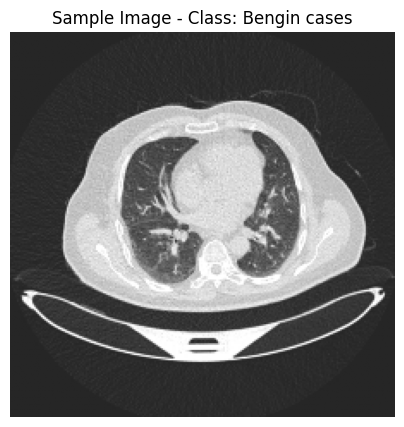

In [13]:
# --- 4. Visualize a Sample ---
print("\n--- Phase 4: Visualizing a Sample ---")

plt.figure(figsize = (5, 5))
plt.imshow(X[0]) #show first image in processed dataset
plt.title(f"Sample Image - Class: {class_names[y[0]]}")
plt.axis('off')
plt.show()
